In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("..\..\Dataset\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
numVal=data.drop(["sex", "smoker", "region"], axis=1).copy()
scaler=StandardScaler()
scaledval=scaler.fit_transform(numVal)
bmi=scaledval[:,[1,3]]

In [5]:
scaledval = pd.DataFrame(scaledval, 
                                columns = ['age','bmi','children', 'charges'])

In [6]:
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [7]:
km.fit(scaledval)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [8]:
km.labels_

array([1, 1, 1, ..., 1, 1, 2])

In [9]:
km.inertia_

3311.6068872415744

In [10]:
pd.Series(km.labels_).value_counts().sort_index()

0    161
1    596
2    581
dtype: int64

In [11]:
km.cluster_centers_

array([[ 0.04142446,  0.7533647 ,  0.0397823 ,  2.26692511],
       [-0.85242963, -0.30053569, -0.05927415, -0.56600329],
       [ 0.86295821,  0.09953107,  0.04978046, -0.04756795]])

In [12]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['age','bmi','children','charges'])
cluster_centers

,age,bmi,children,charges
0,0.041424,0.753365,0.039782,2.266925
1,-0.852430,-0.300536,-0.059274,-0.566003
2,0.862958,0.099531,0.049780,-0.047568


Text(0, 0.5, 'Charges')

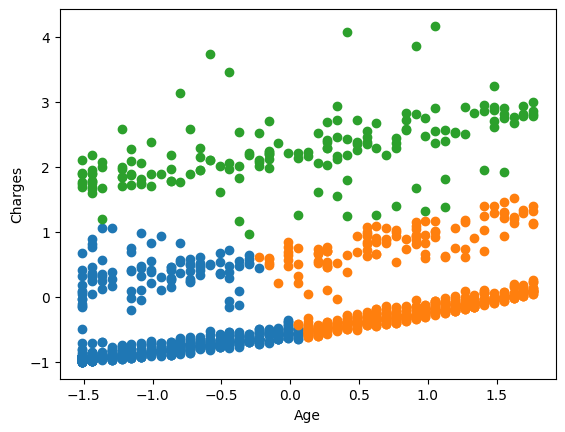

In [13]:
x=scaledval.iloc[:,[0,3]].values
y=km.fit_predict(x)
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==2,0], x[y==2,1])

plt.xlabel("Age")
plt.ylabel("Charges")

Text(0, 0.5, 'Charges')

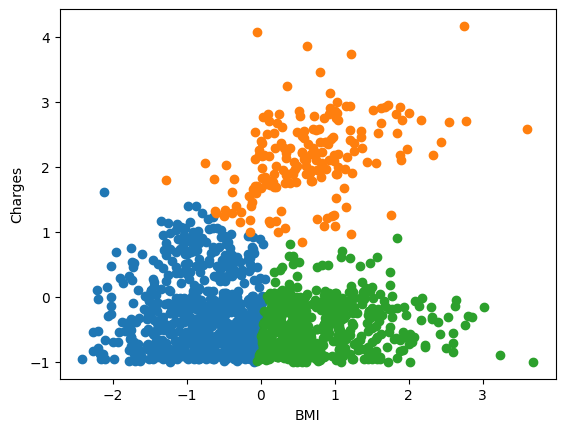

In [14]:
x=scaledval.iloc[:,[1,3]].values
y=km.fit_predict(x)
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==2,0], x[y==2,1])
plt.xlabel("BMI")
plt.ylabel("Charges")

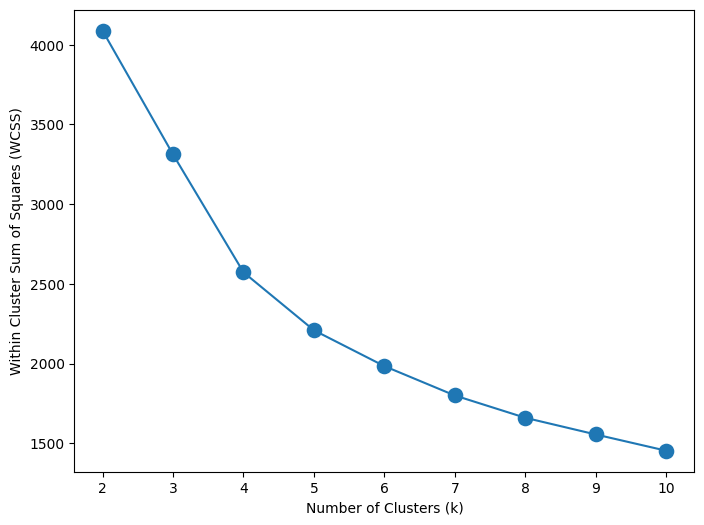

In [15]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(scaledval)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

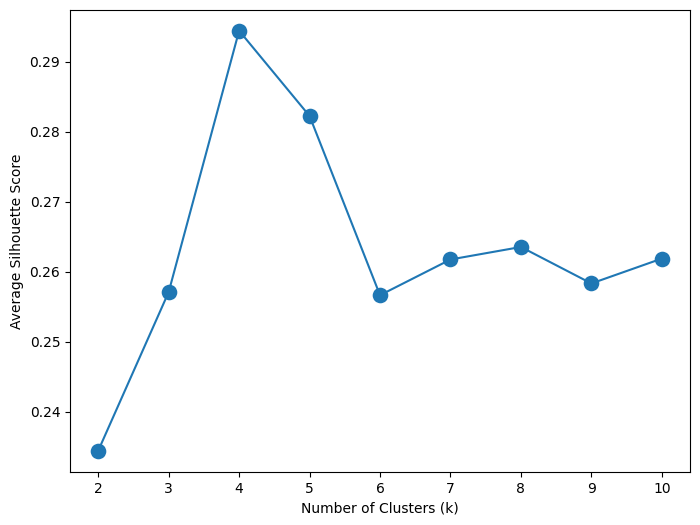

In [16]:
silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(scaledval)
    silhouette.append(silhouette_score(scaledval, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

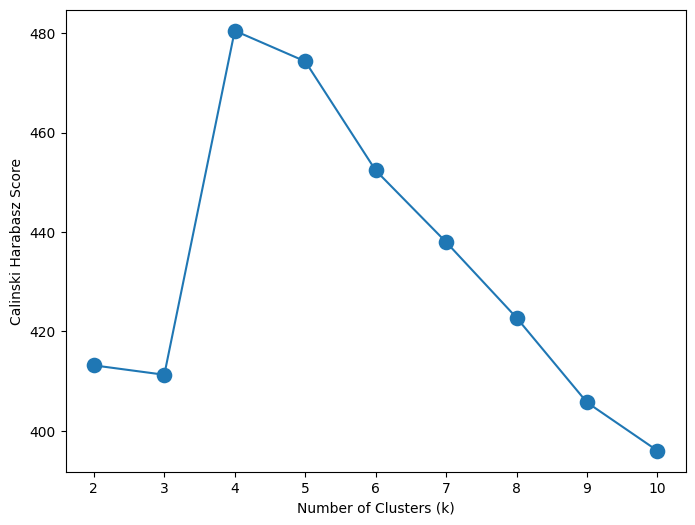

In [17]:
calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(scaledval)
    calinski.append(calinski_harabasz_score(scaledval, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

In [18]:
km = KMeans(n_clusters = 4, n_init = 25, random_state = 1234)
km.fit(scaledval)

KMeans(n_clusters=4, n_init=25, random_state=1234)

In [19]:
pd.Series(km.labels_).value_counts().sort_index()

0    165
1    419
2    346
3    408
dtype: int64

In [20]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['age','bmi','children','charges'])

In [21]:
data['Cluster'] = km.labels_.tolist()
data.head(10)

,age,sex,bmi,children,smoker,region,charges,Cluster
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
5,31,female,25.740,0,no,southeast,3756.62160,1
6,46,female,33.440,1,no,southeast,8240.58960,3
7,37,female,27.740,3,no,northwest,7281.50560,2
8,37,male,29.830,2,no,northeast,6406.41070,2
9,60,female,25.840,0,no,northwest,28923.13692,3


In [22]:
data = pd.get_dummies(data, columns = ['sex','smoker'])
data.head(10)

,age,bmi,children,region,charges,Cluster,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,1,0,0,1
1,18,33.770,1,southeast,1725.55230,1,0,1,1,0
2,28,33.000,3,southeast,4449.46200,2,0,1,1,0
3,33,22.705,0,northwest,21984.47061,1,0,1,1,0
4,32,28.880,0,northwest,3866.85520,1,0,1,1,0
5,31,25.740,0,southeast,3756.62160,1,1,0,1,0
6,46,33.440,1,southeast,8240.58960,3,1,0,1,0
7,37,27.740,3,northwest,7281.50560,2,1,0,1,0
8,37,29.830,2,northeast,6406.41070,2,0,1,1,0
9,60,25.840,0,northwest,28923.13692,3,1,0,1,0


In [23]:
data.agg({
    'sex_female': 'mean',
    'sex_male': 'mean',
    'smoker_no': 'mean',
    'smoker_yes': 'mean',
    'bmi': 'median',
    'charges': 'median'}).round(2)

sex_female       0.49
sex_male         0.51
smoker_no        0.80
smoker_yes       0.20
bmi             30.40
charges       9382.03
dtype: float64

In [24]:
data.groupby('Cluster').agg({
    'sex_female': 'mean',
    'sex_male': 'mean',
    'smoker_no': 'mean',
    'smoker_yes': 'mean',
    'bmi': 'median',
    'charges': 'median'}).round(2)

,sex_female,sex_male,smoker_no,smoker_yes,bmi,charges
Cluster,,,,,,
0,0.38,0.62,0.10,0.90,34.96,39774.28
1,0.51,0.49,0.90,0.10,28.78,3227.12
2,0.50,0.50,0.88,0.12,29.72,8600.33
3,0.51,0.49,0.90,0.10,30.40,11349.37
